In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# import scikit-learn

## 1. Load Data

In [28]:
df = pd.read_csv("/Users/soptey.np/puthi's school database/AIT, Thailand/AIT, Master's Class/Machine Learning/Assignments/Car Prediction/Cars.csv") #read file cars.csv
df.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [29]:
#display shape and info of the dataset

df.shape
df.info
df.columns # list columns
df_copy = df.copy() # Save dataframe

In [30]:
# Change brand to appear only first name
df_copy["brand"] = df_copy["name"].str.split(" ").str[0]
df_copy.drop(["name"], axis=1, inplace=True)

# Split features of mileage, engine and max power into value and unit
df_copy[["mileage_value","mileage_unit"]] = df_copy["mileage"].str.split(pat=' ', expand = True)
df_copy[["engine_value","engine_unit"]] = df_copy["engine"].str.split(pat=' ', expand = True)
df_copy[["max_power_value","max_power_unit"]] = df_copy["max_power"].str.split(pat=' ', expand = True)
df_copy.drop(["mileage","engine","max_power"], axis=1, inplace=True)
df_copy.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,brand,mileage_value,mileage_unit,engine_value,engine_unit,max_power_value,max_power_unit
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,Maruti,23.4,kmpl,1248,CC,74,bhp
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,Skoda,21.14,kmpl,1498,CC,103.52,bhp
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,17.7,kmpl,1497,CC,78,bhp
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,Hyundai,23.0,kmpl,1396,CC,90,bhp
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,16.1,kmpl,1298,CC,88.2,bhp
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,113.75nm@ 4000rpm,5.0,Hyundai,20.14,kmpl,1197,CC,81.86,bhp
6,2007,96000,175000,LPG,Individual,Manual,First Owner,"7.8@ 4,500(kgm@ rpm)",5.0,Maruti,17.3,km/kg,1061,CC,57.5,bhp
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,59Nm@ 2500rpm,4.0,Maruti,16.1,kmpl,796,CC,37,bhp
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,170Nm@ 1800-2400rpm,5.0,Toyota,23.59,kmpl,1364,CC,67.1,bhp
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,160Nm@ 2000rpm,5.0,Ford,20.0,kmpl,1399,CC,68.1,bhp


** Mapping the 'owner' feature **

- 1: First Owner
- 2: Second Owner
- 3: Third Owner
- 4: Fourth Owner
- 5: Test Drive Car

In [31]:
# Mapping owner feature into ordinal numbers
dict_owner = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4,
            'Test Drive Car':5}
df_copy["owner"] = df_copy["owner"].map(dict_owner)
df_copy.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,brand,mileage_value,mileage_unit,engine_value,engine_unit,max_power_value,max_power_unit
0,2014,450000,145500,Diesel,Individual,Manual,1,190Nm@ 2000rpm,5.0,Maruti,23.4,kmpl,1248,CC,74,bhp
1,2014,370000,120000,Diesel,Individual,Manual,2,250Nm@ 1500-2500rpm,5.0,Skoda,21.14,kmpl,1498,CC,103.52,bhp
2,2006,158000,140000,Petrol,Individual,Manual,3,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,17.7,kmpl,1497,CC,78,bhp
3,2010,225000,127000,Diesel,Individual,Manual,1,22.4 kgm at 1750-2750rpm,5.0,Hyundai,23.0,kmpl,1396,CC,90,bhp
4,2007,130000,120000,Petrol,Individual,Manual,1,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,16.1,kmpl,1298,CC,88.2,bhp
5,2017,440000,45000,Petrol,Individual,Manual,1,113.75nm@ 4000rpm,5.0,Hyundai,20.14,kmpl,1197,CC,81.86,bhp
6,2007,96000,175000,LPG,Individual,Manual,1,"7.8@ 4,500(kgm@ rpm)",5.0,Maruti,17.3,km/kg,1061,CC,57.5,bhp
7,2001,45000,5000,Petrol,Individual,Manual,2,59Nm@ 2500rpm,4.0,Maruti,16.1,kmpl,796,CC,37,bhp
8,2011,350000,90000,Diesel,Individual,Manual,1,170Nm@ 1800-2400rpm,5.0,Toyota,23.59,kmpl,1364,CC,67.1,bhp
9,2013,200000,169000,Diesel,Individual,Manual,1,160Nm@ 2000rpm,5.0,Ford,20.0,kmpl,1399,CC,68.1,bhp


In [32]:
# remove rows that use different mileage system from kmfeaturepl
# therefore, for feature fuel, remove all rows with CNG and LPG

df_copy = df_copy.loc[(df_copy["fuel"] != 'LPG') & (df_copy["fuel"] != 'CNG')]
df_copy.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,brand,mileage_value,mileage_unit,engine_value,engine_unit,max_power_value,max_power_unit
0,2014,450000,145500,Diesel,Individual,Manual,1,190Nm@ 2000rpm,5.0,Maruti,23.4,kmpl,1248,CC,74,bhp
1,2014,370000,120000,Diesel,Individual,Manual,2,250Nm@ 1500-2500rpm,5.0,Skoda,21.14,kmpl,1498,CC,103.52,bhp
2,2006,158000,140000,Petrol,Individual,Manual,3,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,17.7,kmpl,1497,CC,78,bhp
3,2010,225000,127000,Diesel,Individual,Manual,1,22.4 kgm at 1750-2750rpm,5.0,Hyundai,23.0,kmpl,1396,CC,90,bhp
4,2007,130000,120000,Petrol,Individual,Manual,1,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,16.1,kmpl,1298,CC,88.2,bhp
5,2017,440000,45000,Petrol,Individual,Manual,1,113.75nm@ 4000rpm,5.0,Hyundai,20.14,kmpl,1197,CC,81.86,bhp
7,2001,45000,5000,Petrol,Individual,Manual,2,59Nm@ 2500rpm,4.0,Maruti,16.1,kmpl,796,CC,37,bhp
8,2011,350000,90000,Diesel,Individual,Manual,1,170Nm@ 1800-2400rpm,5.0,Toyota,23.59,kmpl,1364,CC,67.1,bhp
9,2013,200000,169000,Diesel,Individual,Manual,1,160Nm@ 2000rpm,5.0,Ford,20.0,kmpl,1399,CC,68.1,bhp
10,2014,500000,68000,Diesel,Individual,Manual,2,248Nm@ 2250rpm,5.0,Renault,19.01,kmpl,1461,CC,108.45,bhp


In [33]:
# convert the columns that contain values of features: mileage, engine and max_power into numerical datatype 
# in this case, im converting it into 'float'

df_copy[["mileage","engine","max_power"]] = df_copy[["mileage_value","engine_value","max_power_value"]].astype('float64')
df_copy.drop(["mileage_value","engine_value","max_power_value",
        "mileage_unit","engine_unit","max_power_unit"], axis=1, inplace = True)

# Arrange the columns
df_copy = df_copy.reindex(columns = ['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])

df_copy

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [ ]:
#drop feature 'torque' because Chaky’s company does not understand well about it

df_copy.drop(['torque'], axis = 1, inplace = True)
df_copy.head(10)

# 2. Exploratory Data Analysis

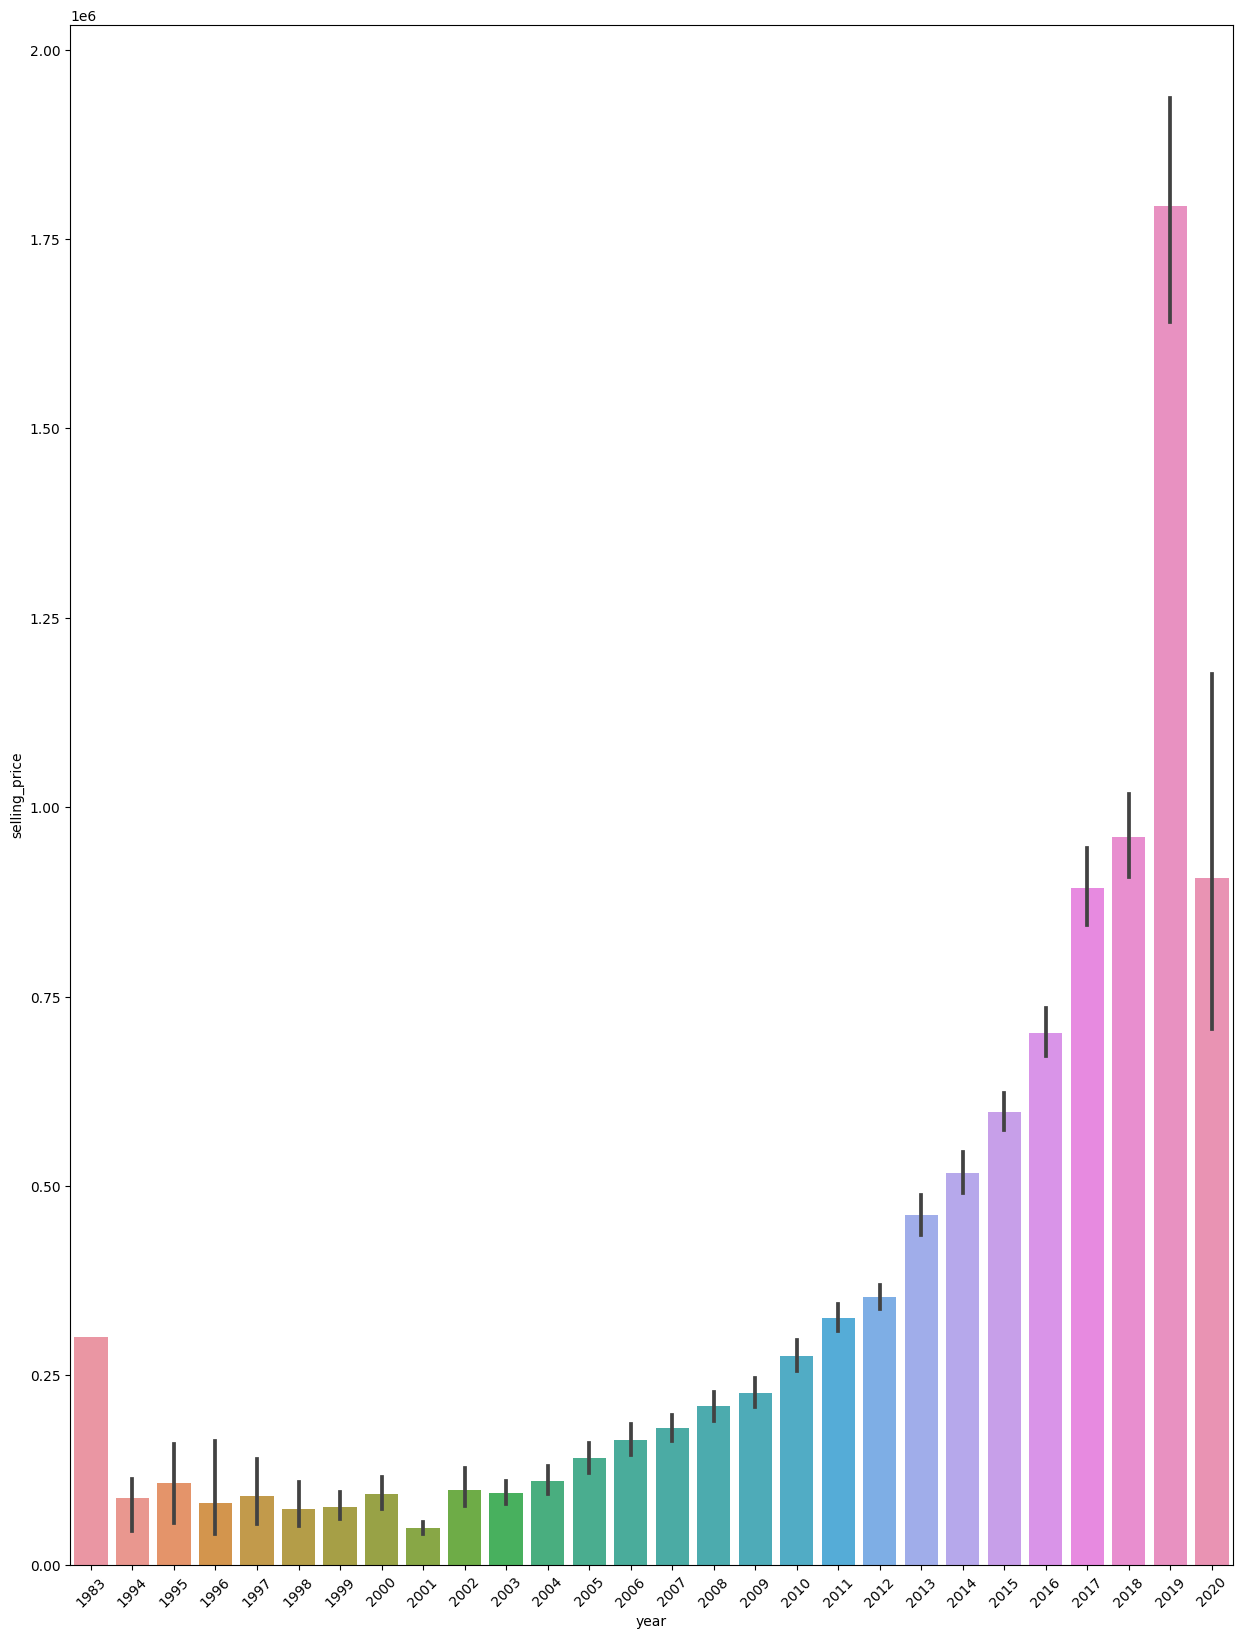

In [ ]:
# bar chart for selling price in each year
# using pyplot and seaborn

plt.figure(figsize = (15,20))
sns.barplot(data = df_copy, x = "year", y = "selling_price")
plt.xticks(rotation = 45)
plt.show()

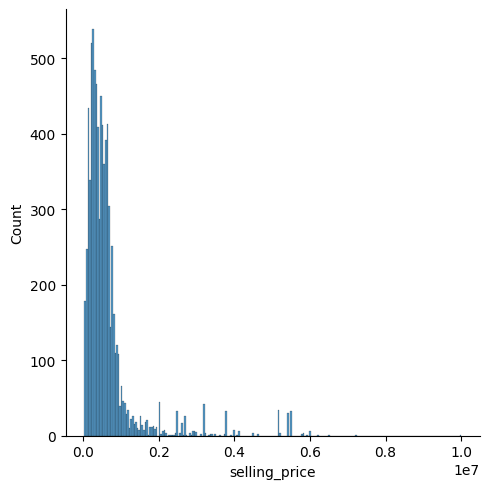

In [ ]:
# histogram plot for selling price using seaborn

sns.displot(x = df_copy["selling_price"])

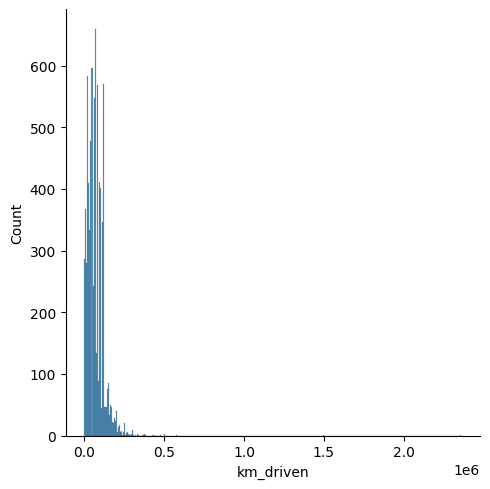

In [ ]:
# histogram plot for km_driven using seaborn

sns.displot(x = df_copy["km_driven"])

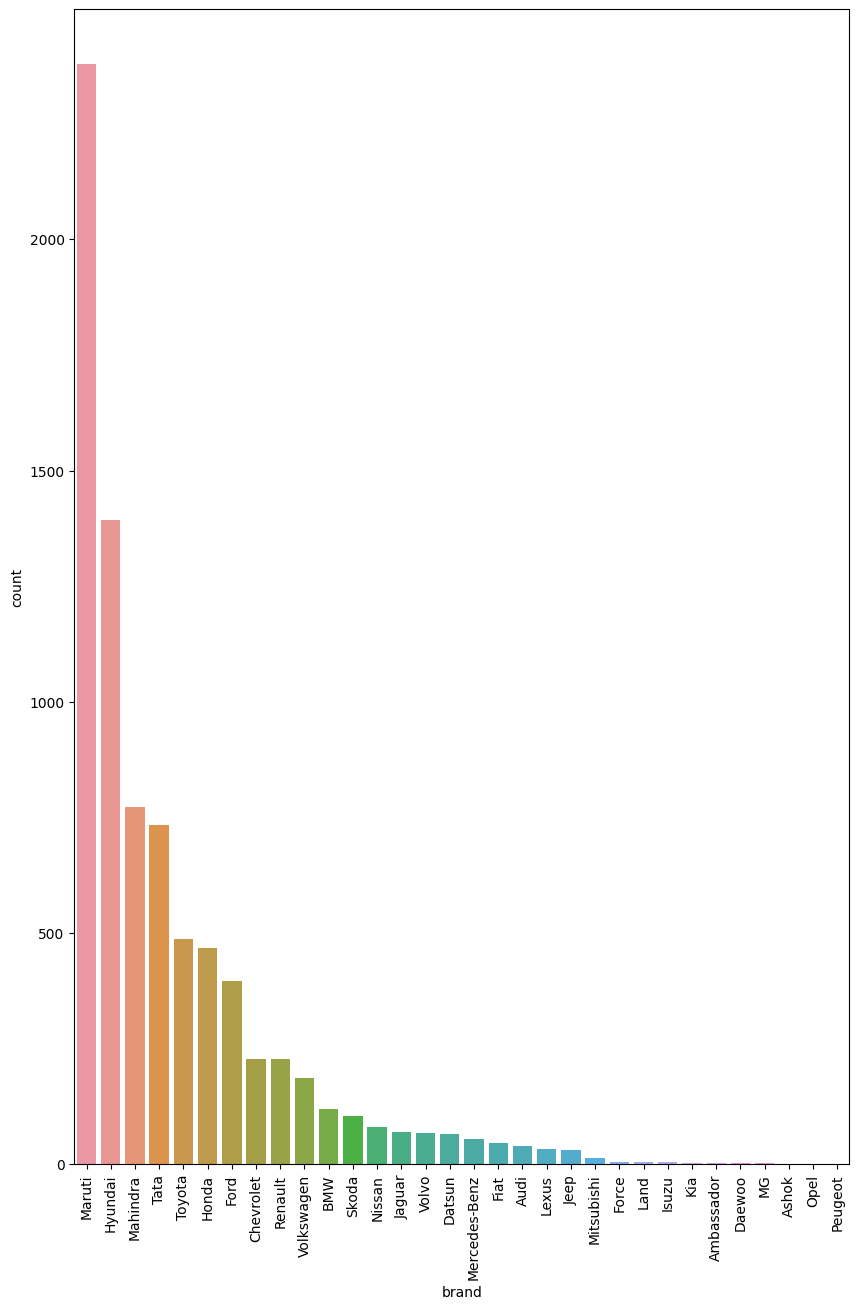

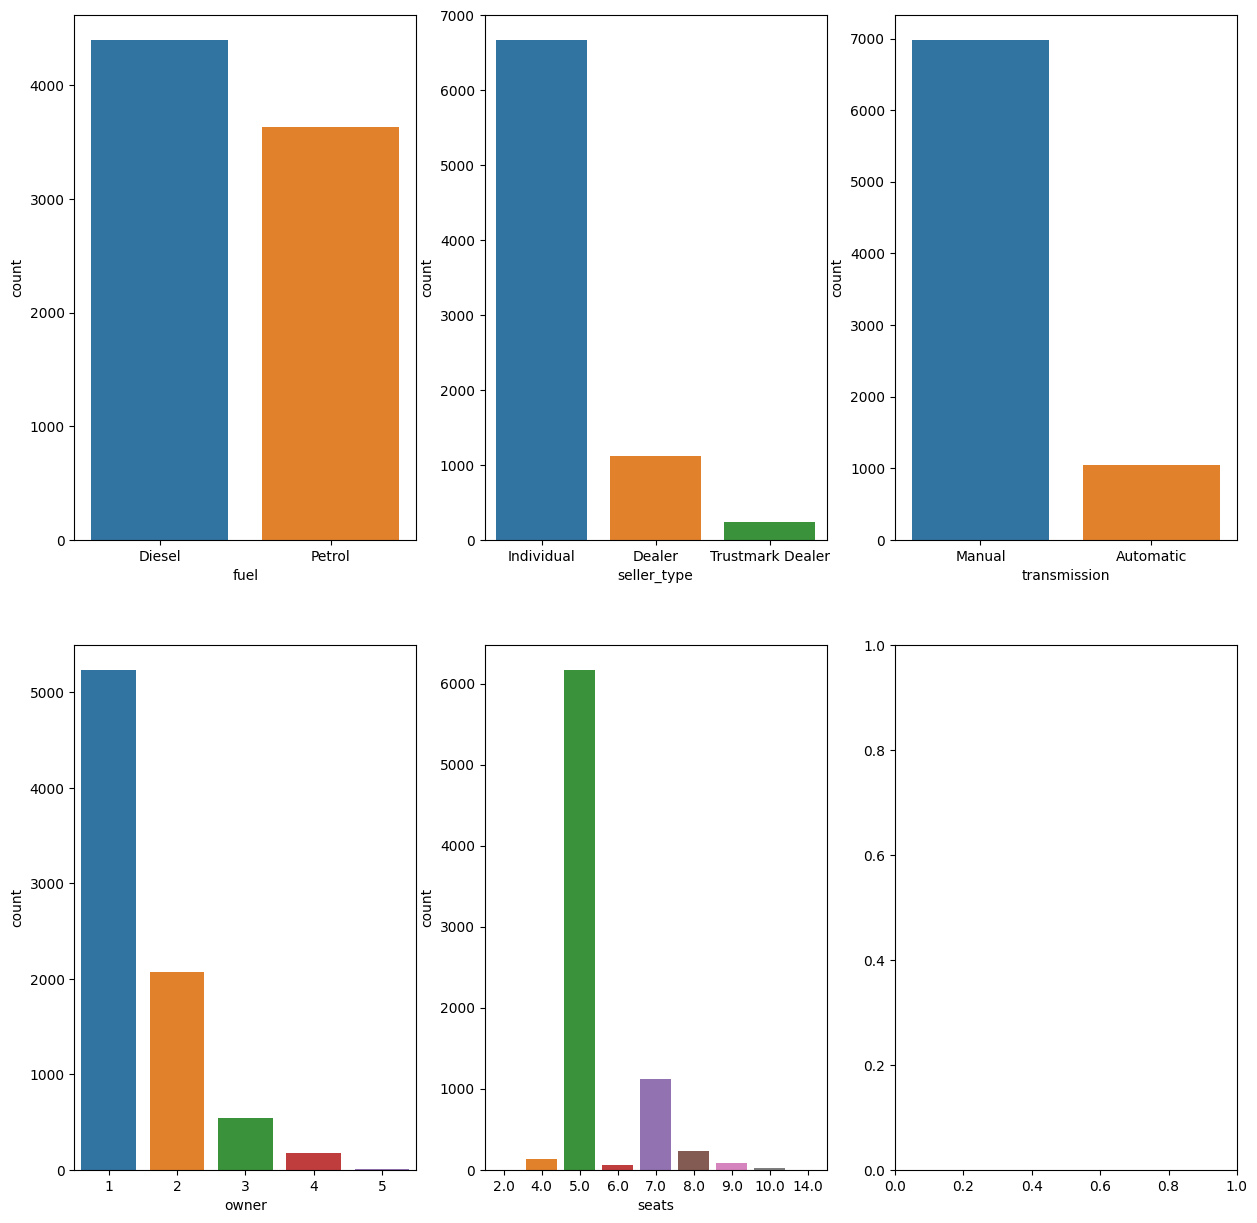

In [ ]:
# countplot for car brand name

plt.figure(figsize = (10,15))
sns.countplot(data = df_copy, x = 'brand', order = df_copy['brand'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

# countplot for types of fuel, types of seller, types of transmission, types of owner car and numbers of seats

fig, ax = plt.subplots(2,3, figsize = (15,15))
for i, col in enumerate(["fuel", "seller_type", "transmission", "owner","seats"]):
    graph = sns.countplot(data = df_copy, x = col, ax = ax[i//3,i%3])

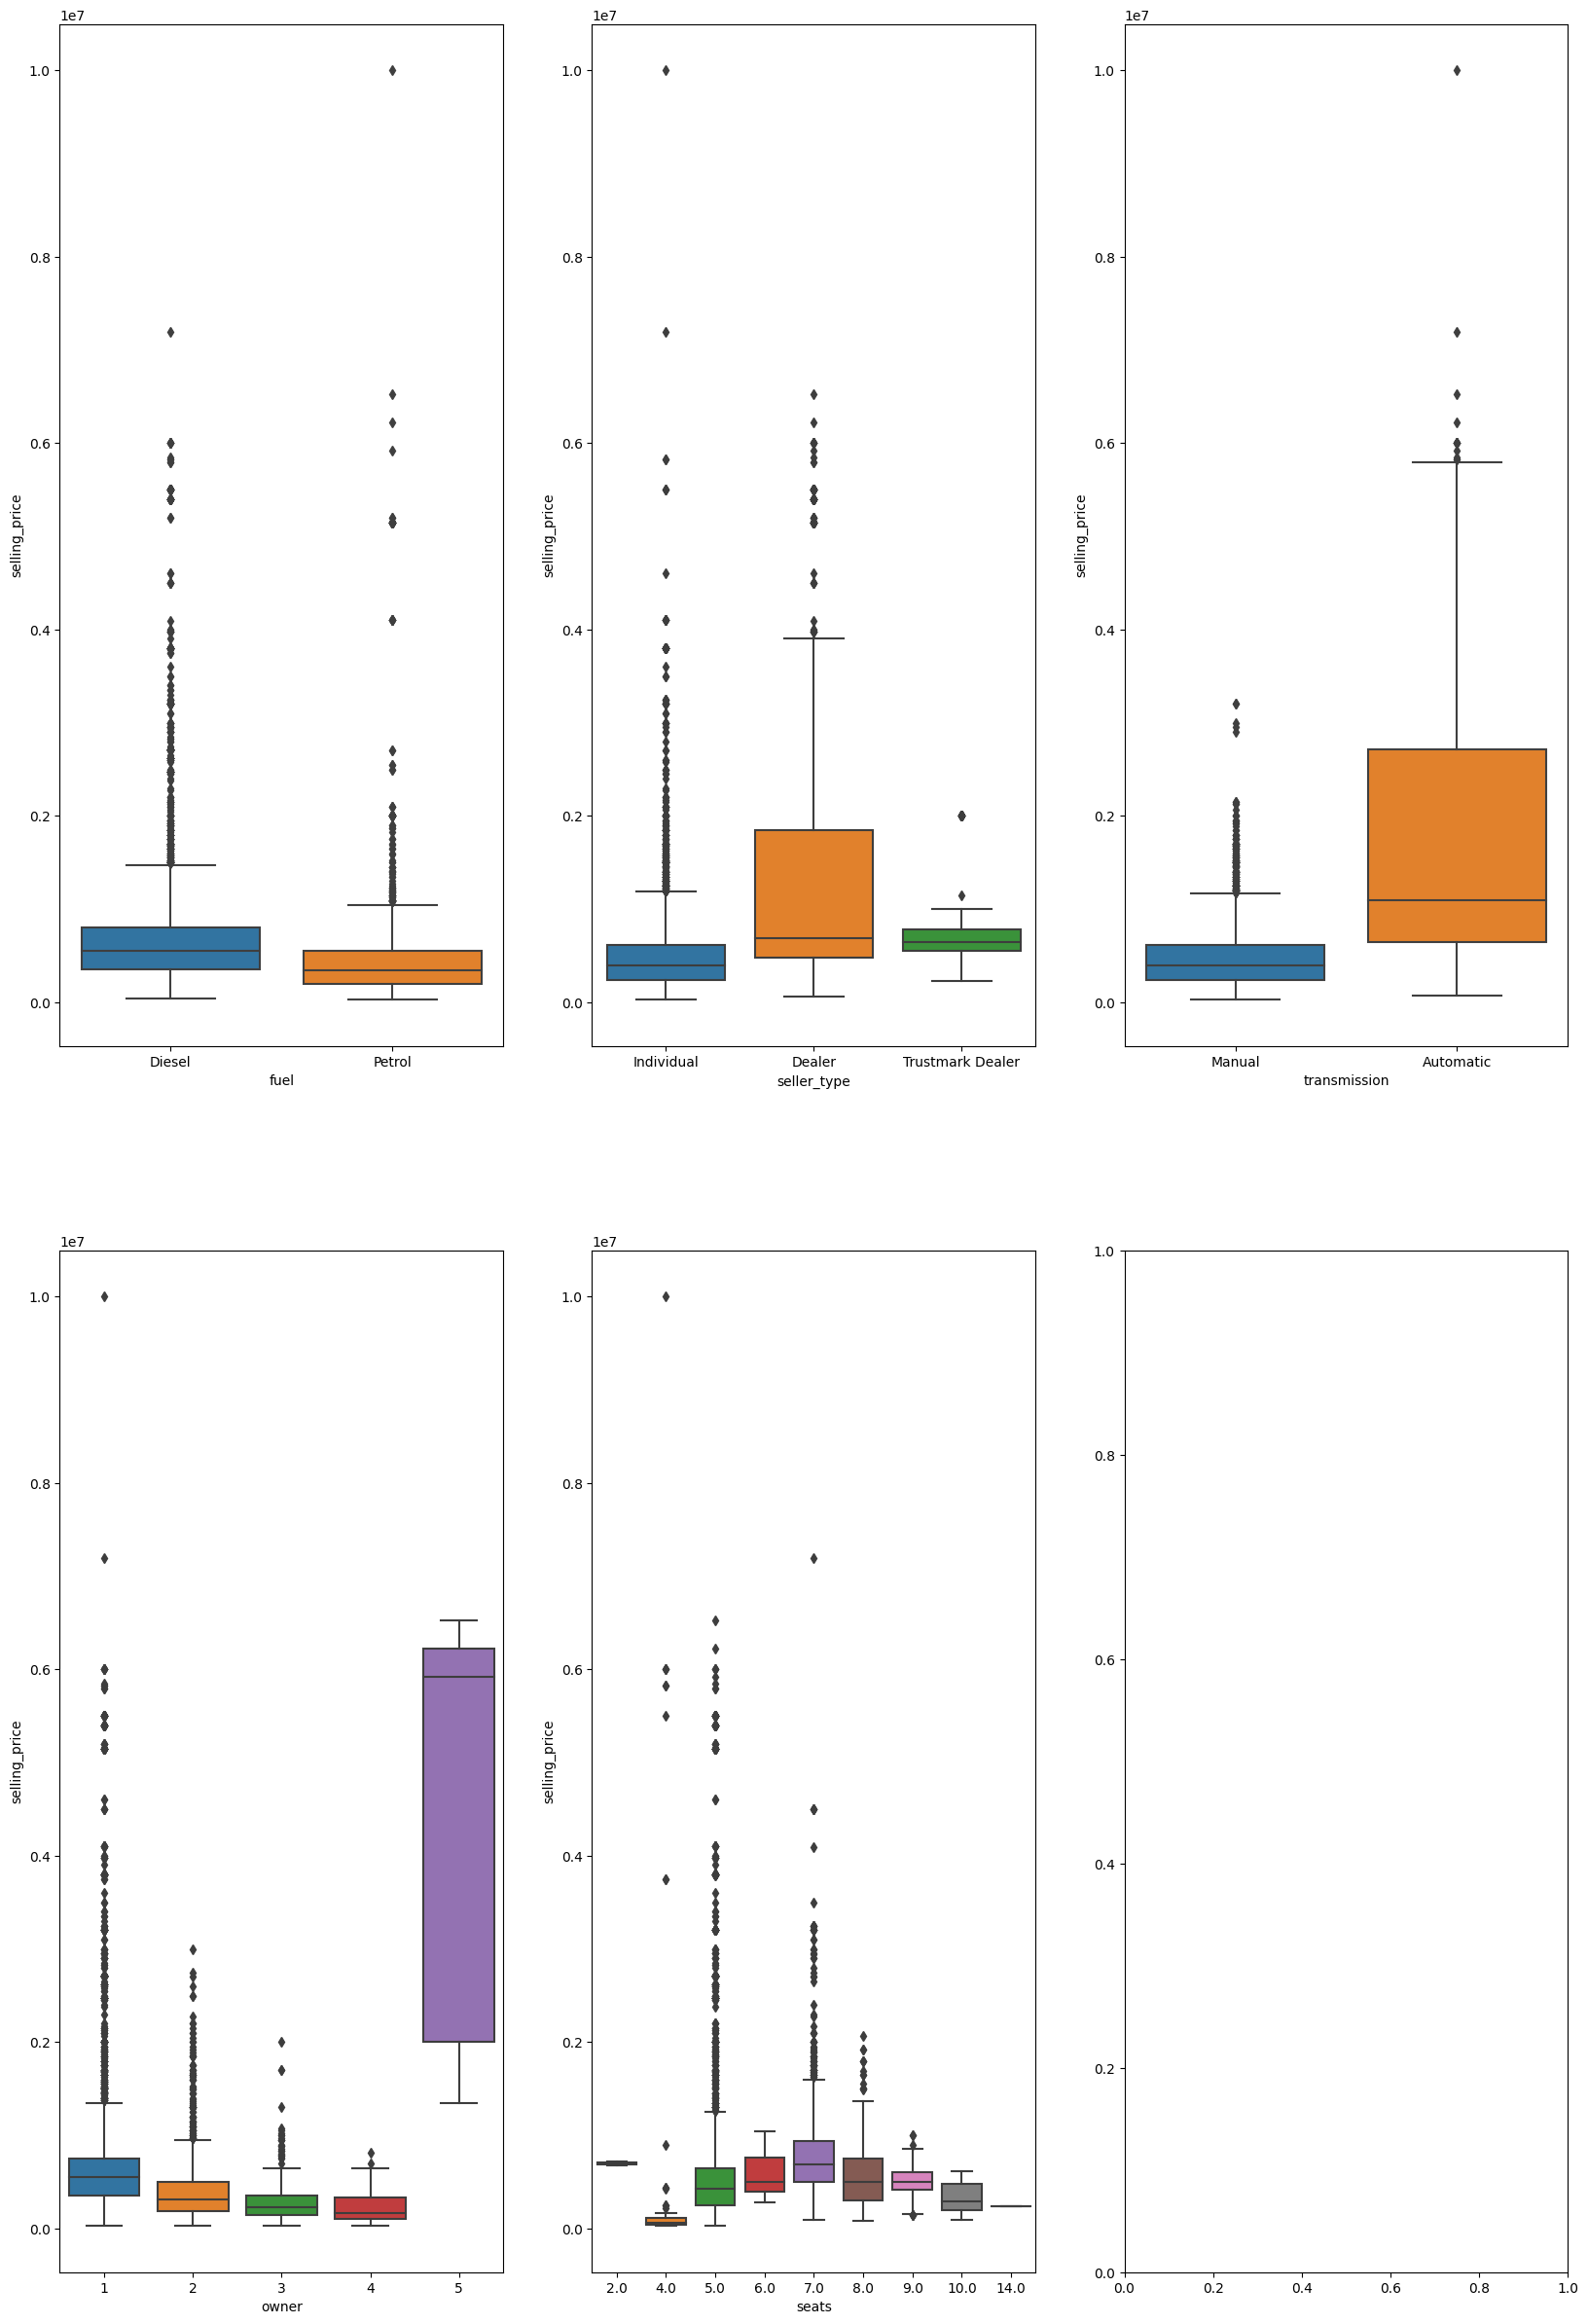

In [ ]:
# boxplot of selling price of car in each types of fuel, types of seller, types of transmission,  types of owner car and numbers of seats

fig, ax = plt.subplots(2,3, figsize = (20,30))
for i, col in enumerate(["fuel", "seller_type", "transmission", "owner", "seats"]):
    sns.boxplot(data = df_copy, x = col, y = "selling_price", ax = ax[i//3,i%3])

The analysis from box_plot shows that the selling car price of test driver (number 5) is ridiculously expensive. 

Therefore, we delete all samples related to the test driver feature

<Axes: xlabel='owner', ylabel='selling_price'>

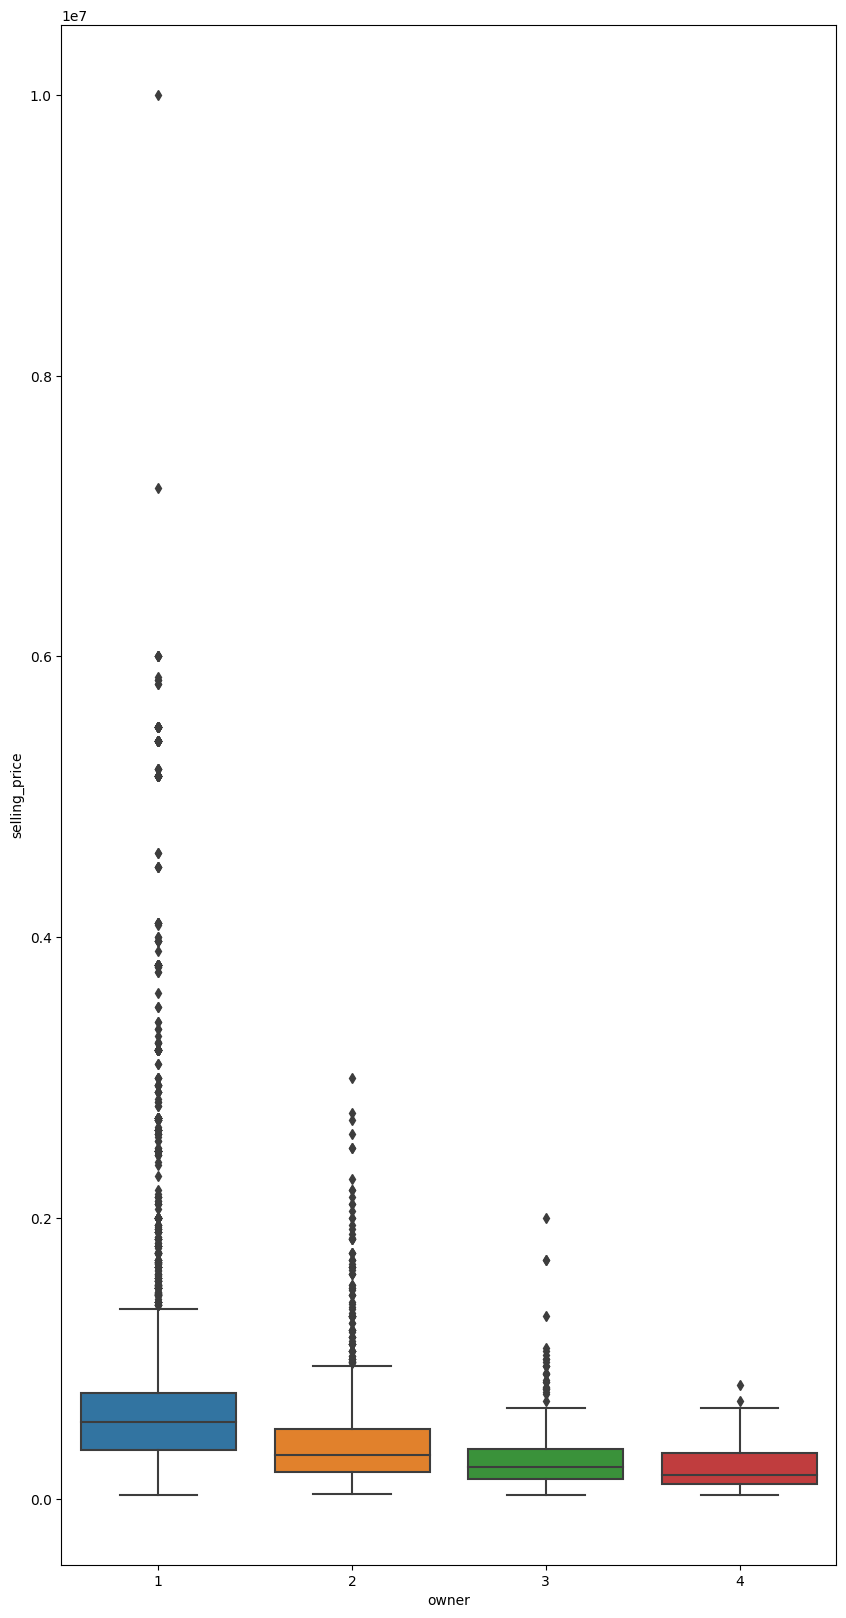

In [35]:


df_copy = df_copy[df_copy["owner"] != 5]
plt.figure(figsize = (10,20))
sns.boxplot(data = df_copy, x = "owner", y = "selling_price")

In [43]:
# convert features of fuel, seller_type and transmission into number by label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_copy["fuel"] = le.fit_transform(df_copy["fuel"])
df_copy["seller_type"] = le.fit_transform(df_copy["seller_type"])
df_copy["transmission"] = le.fit_transform(df_copy["transmission"])
df_copy.head(10)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,440000,45000,1,1,1,1,20.14,1197.0,81.86,5.0
7,Maruti,2001,45000,5000,1,1,1,2,16.10,796.0,37.00,4.0
8,Toyota,2011,350000,90000,0,1,1,1,23.59,1364.0,67.10,5.0
9,Ford,2013,200000,169000,0,1,1,1,20.00,1399.0,68.10,5.0
10,Renault,2014,500000,68000,0,1,1,2,19.01,1461.0,108.45,5.0


<Axes: xlabel='x', ylabel='y'>

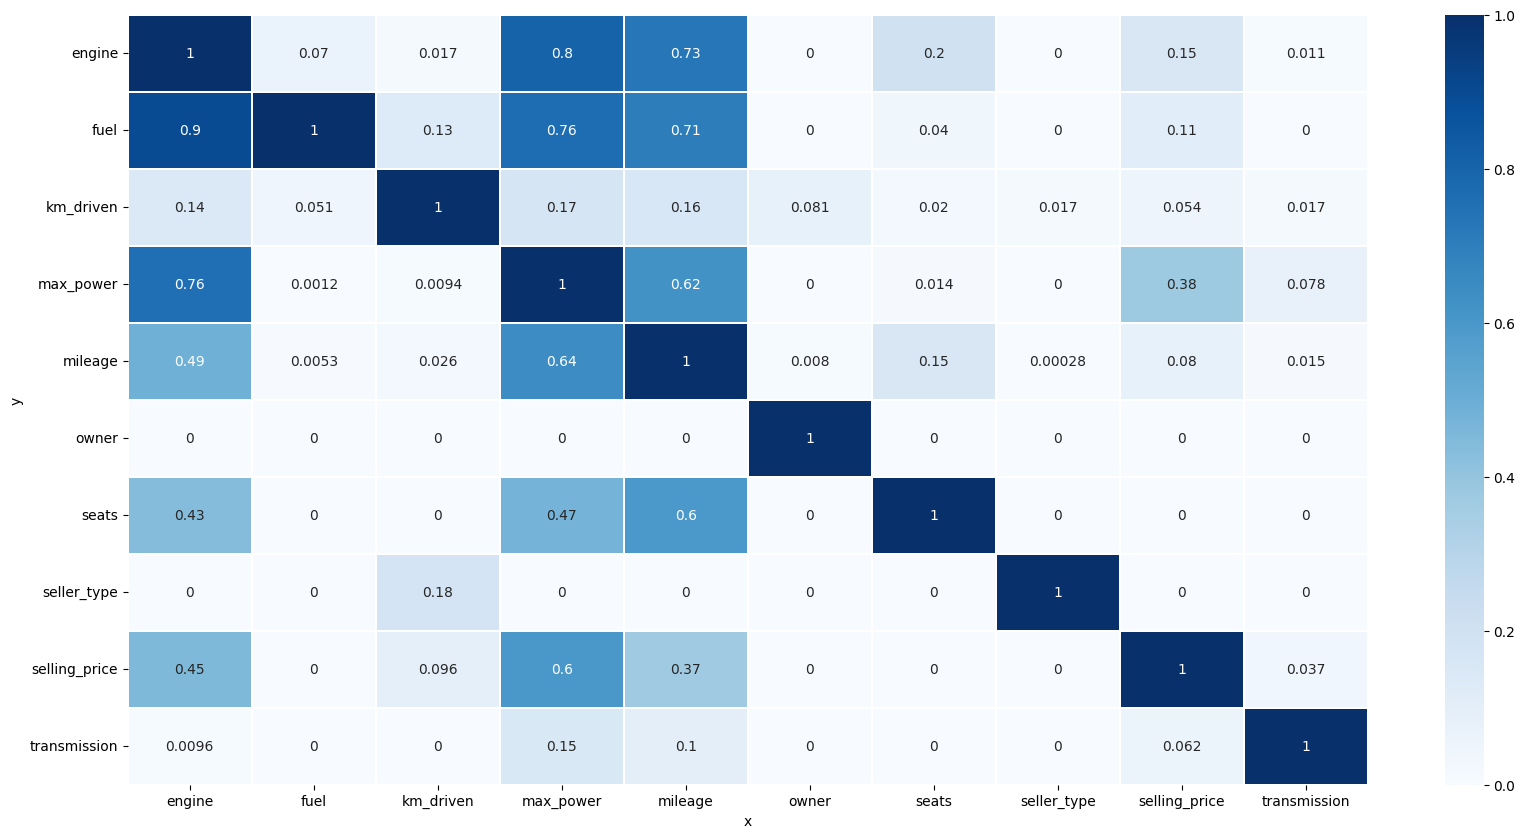

In [46]:
# check actual prediction by predictive power score
import ppscore as pps

# drop brand and year
dfcopy = df_copy.copy()
dfcopy.drop(['brand', 'year'], axis= 1, inplace=True)
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize = (20,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.25, annot=True)

In [47]:
# transform features km_driver into log number
# using log_transform becuase the number is too big, which might cause an unstable prediction

df_copy["log_km_driven"] = np.log(df_copy["km_driven"])
df_copy.head(15)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,log_km_driven
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0,11.887931
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0,11.695247
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0,11.849398
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0,11.751942
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0,11.695247
5,Hyundai,2017,440000,45000,1,1,1,1,20.14,1197.0,81.86,5.0,10.714418
7,Maruti,2001,45000,5000,1,1,1,2,16.10,796.0,37.00,4.0,8.517193
8,Toyota,2011,350000,90000,0,1,1,1,23.59,1364.0,67.10,5.0,11.407565
9,Ford,2013,200000,169000,0,1,1,1,20.00,1399.0,68.10,5.0,12.037654
10,Renault,2014,500000,68000,0,1,1,2,19.01,1461.0,108.45,5.0,11.127263


<Axes: xlabel='x', ylabel='y'>

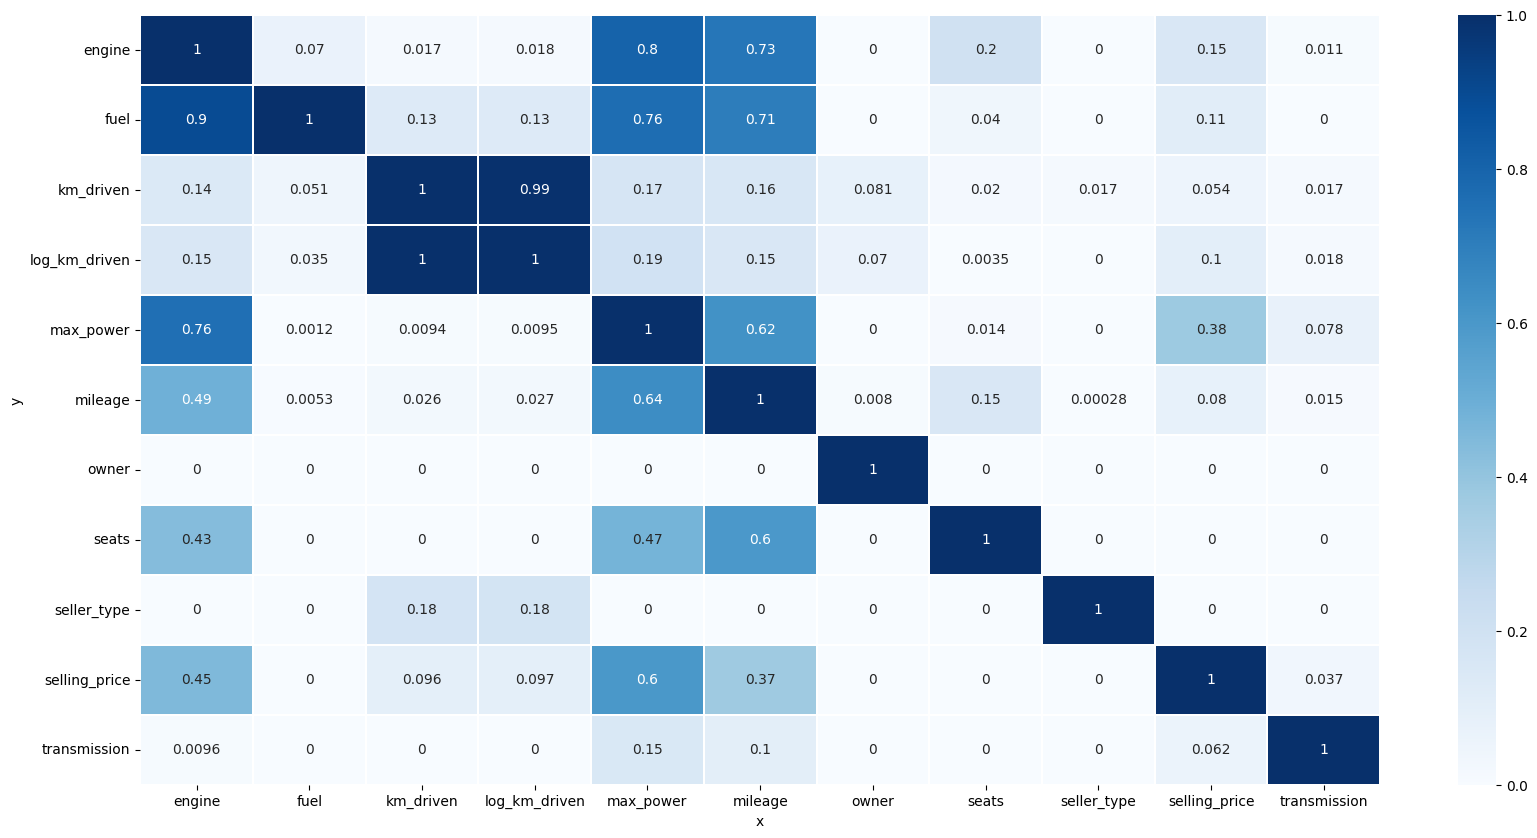

In [48]:
# create actual prediction in heatmap
dfcopy = df_copy.copy()
dfcopy.drop(['brand', 'year'], axis= 1, inplace=True)
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize = (20,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.25, annot=True)

# 3. Selecting Features

In [49]:
# the features used for prediction are as below

X = df_copy[['max_power', 'mileage', 'log_km_driven']]

In [50]:
# since selling price is a big number, it can cause your prediction to be very unstable. 
# transform the label using log transform, i.e.,

y = np.log(df_copy['selling_price'])

In [51]:
# train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 30)

# 4. Preprocessing

In [53]:
# train and test of X

X_train.isnull().sum()
X_test.isnull().sum()


max_power        31
mileage          31
log_km_driven     0
dtype: int64

In [54]:
# train and test of Y

y_train.isnull().sum()
y_test.isnull().sum()

0

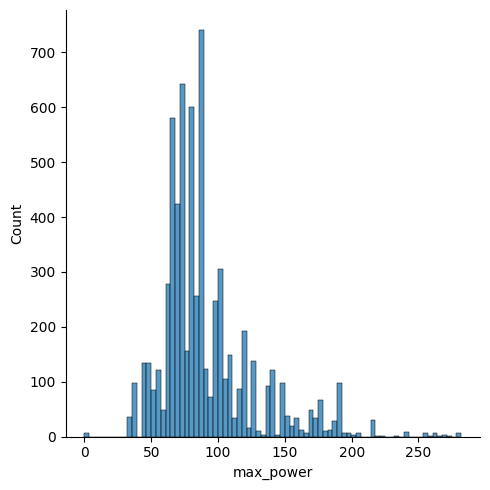

In [55]:
# check distribution of max_power
sns.displot(data=X_train, x = 'max_power')
plt.tight_layout()

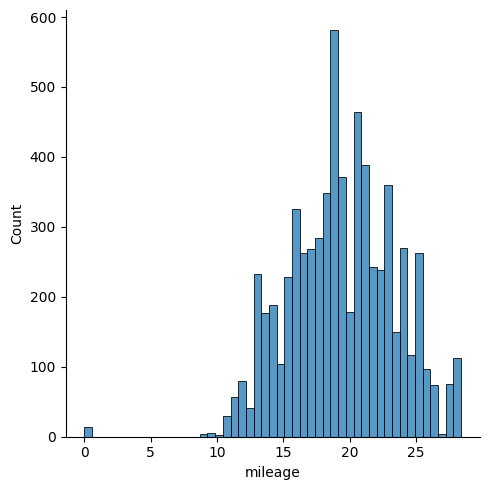

In [56]:
# check distribution of mileage
sns.displot(data=X_train, x = 'mileage')
plt.tight_layout()

The graphs showed that the distribution of mileage gives a better configuration than max_power does. 

So, means is used for best configuration for mileage, while median is best to infill in max_power

In [57]:
# Fill training set 
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [58]:
# Fill testing set 
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [59]:
# check X training dataset and testing dataset again
X_train.isnull().sum()

max_power        0
mileage          0
log_km_driven    0
dtype: int64

In [60]:
X_test.isnull().sum()

max_power        0
mileage          0
log_km_driven    0
dtype: int64

In [61]:
# check which row in train_set has mileage lower than 5
X_train[X_train["mileage"]<5]

,max_power,mileage,log_km_driven
6629,70.00,0.0,11.289782
2725,62.10,0.0,9.615805
7337,194.00,0.0,11.002100
7002,62.10,0.0,11.289782
2137,115.00,0.0,11.078876
4527,165.00,0.0,11.608236
1649,62.00,0.0,11.759786
5846,103.25,0.0,10.243525
6824,62.00,0.0,10.596635
785,62.00,0.0,11.407565


In [62]:
# check which row in train_set has max_power lower than 5
X_train[X_train["max_power"]<5]

,max_power,mileage,log_km_driven
2550,0.0,19.416699,11.156251
2549,0.0,19.416699,11.156251
1442,0.0,19.416699,10.626970
1443,0.0,19.416699,10.626970
576,0.0,19.416699,11.487608
575,0.0,19.416699,11.487608


In [63]:
# check shapes of features and target
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6823, 3)
Shape of X_test:  (1205, 3)
Shape of y_train:  (6823,)
Shape of y_test:  (1205,)


# 5. Selecting the Model

In [66]:
# prepare type of regressors

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

algorithms = [LinearRegression(), Ridge(), Lasso(), SVR(),
              KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 200, random_state = 0),
              XGBRegressor(n_estimators = 200, random_state = 0)]

algorithm_names = ["Linear Regression", "Ridge", "Lasso", "SVR", "KNeighbors Regressor", 
                   "Decision-Tree Regressor", "Random-Forest Regressor","XGBRegressor"]


In [67]:
# defining splits of kfold for cross-validation
kfold = KFold(n_splits=8, shuffle=True)

# iterate for finding mse and mean mse for each model
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.25302335 -0.24059699 -0.27773397 -0.25210733 -0.24013481 -0.2305088
 -0.2386936  -0.2451779 ]; Mean: -0.24724709204299183
Ridge - Score: [-0.28218095 -0.24509509 -0.24278079 -0.23255507 -0.24539777 -0.24540218
 -0.24315299 -0.24296478]; Mean: -0.24744120192314112
Lasso - Score: [-0.33487591 -0.37526618 -0.33841825 -0.33951959 -0.32435051 -0.34398126
 -0.31200421 -0.36455702]; Mean: -0.34162161753297193
SVR - Score: [-0.2773769  -0.23325515 -0.231354   -0.23150728 -0.22560419 -0.2452934
 -0.22778994 -0.23732238]; Mean: -0.23868790371545937
KNeighbors Regressor - Score: [-0.12105584 -0.11338175 -0.1306859  -0.10492658 -0.10381986 -0.1158773
 -0.10276629 -0.11562616]; Mean: -0.1135174617532907
Decision-Tree Regressor - Score: [-0.11559954 -0.14532875 -0.15190947 -0.13642789 -0.11950355 -0.12751614
 -0.13048908 -0.11380879]; Mean: -0.1300729010893641
Random-Forest Regressor - Score: [-0.09323685 -0.08486673 -0.09501174 -0.09539255 -0.08420932 -0.09608701
 -0.

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 15], 'learning_rate': [0.01, 0.02, 0.05, 0.1],
              'n_estimators': [200, 300, 400, 500, 600]}

rf = XGBRegressor(random_state = 10)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')


In [70]:
# fit your grid_search
grid.fit(X_train, y_train);  

# 6. Test Model

In [71]:
pred_y = grid.predict(X_test)
print("MSE of this model is:",mean_squared_error(np.exp(y_test), np.exp(pred_y)))# find mse
print("R-squared of this model is:", r2_score(np.exp(y_test), np.exp(pred_y))) # find r2

MSE of this model is: 61333085857.87863
R-squared of this model is: 0.906491516182925


# 7. Analysis: Feature Importance

In [72]:
# find feature importance after applying XGBRegressor model
rf = grid.best_estimator_
rf.feature_importances_

array([0.76958454, 0.15774278, 0.07267267], dtype=float32)

Text(0.5, 0, 'Random Forest Feature Importance')

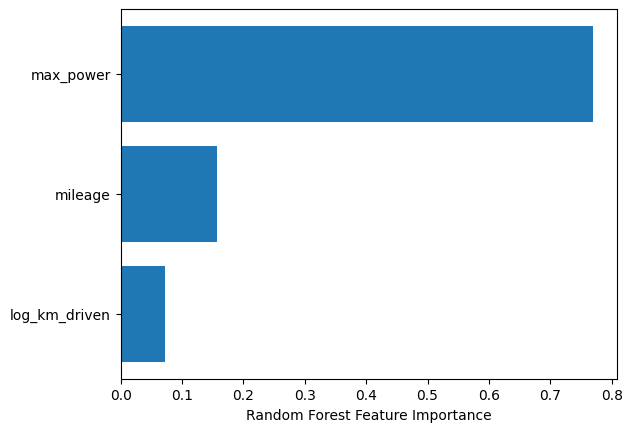

In [73]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# 8. Interference

In [74]:
import pickle

# save the model 
filename = 'car_prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [75]:
# load the model for testing
loaded_model = pickle.load(open(filename, 'rb'))

In [76]:
df_copy[["max_power","mileage","log_km_driven","selling_price"]].loc[25]

max_power            83.100000
mileage              21.400000
log_km_driven        10.714418
selling_price    575000.000000
Name: 25, dtype: float64

In [77]:
sample = np.array([[83.1, 21.4, 10.714418]])
predicted_life_exp = loaded_model.predict(sample)
np.exp(predicted_life_exp)

array([570524.6], dtype=float32)

# SUMMARY

In summary, based on the analysis results, the features that appear to have the highest importance is max_power due to its correlation to prediciting the price. 
Although the features like mileage and log_km_driven are used regularly, however, the features don't have a deep correlation to the analysis to predicting the car price. 

According to model selection, the regression model of XGBRegressor performs the best result in comparison to others since this regressor can handle a great deal of data, and deal with linear or non-linear relationships well. 


Also, after using XGBRegression model, r-square is around 0.9 which means the prediction is good, and mean squared error is pretty high since the target's figure is quite high, making the selling price prediction inaccurate.
